In [348]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [349]:
dataset = load_digits()

In [350]:
dataset.images.shape

(1797, 8, 8)

In [351]:
X = dataset.images[dataset.target>=8]

In [352]:
Y = dataset.target[dataset.target>=8]

In [353]:
Y = Y==8

In [354]:
Y = Y.astype(int)

In [355]:
Y

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1,

In [356]:
X = X.reshape(X.shape[0], -1).T

In [357]:
Y = Y.reshape(Y.shape[0],1).T

In [358]:
Y.shape

(1, 354)

In [359]:
X.shape

(64, 354)

In [360]:
X = X/255

In [361]:
X_train = X[:,:300]
Y_train = Y[:,:300]
X_test = X[:,300:]
Y_test = Y[:,300:]

In [362]:
X_train.shape

(64, 300)

In [363]:
Y_train.shape

(1, 300)

In [364]:
X_test.shape

(64, 54)

In [365]:
Y_test.shape

(1, 54)

In [366]:
#Initialize

In [367]:
w = np.zeros((X_train.shape[0],1))

In [368]:
X_train.shape[0]

64

In [369]:
b = 0

In [370]:
w.shape

(64, 1)

In [371]:
X.shape

(64, 354)

In [372]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [373]:
def propagate(X, Y, w ,b, alpha=0.05, iterations=2000):
    m = X.shape[1]
    i = 0
    costs = []
    while i < iterations:
        A = sigmoid(np.dot(w.T, X) + b)
        J = (-1/m) * ( np.dot(Y,np.log(A).T) + np.dot((1-Y), np.log(1-A).T))
        if i%100 ==0:
            costs.append(J)
            print(J)
        
        dw = np.dot(X, (A-Y).T)
        db = np.sum(A-Y)
        
        w = w - (alpha*dw)
        b = b - (alpha*db)
        i+=1
        
    return w,b,costs
    

In [374]:
w,b,costs = propagate(X_train, Y_train, w, b)

[[ 0.69314718]]
[[ 0.81139218]]
[[ 0.17683696]]
[[ 0.15144874]]
[[ 0.1337676]]
[[ 0.12060209]]
[[ 0.11033346]]
[[ 0.10204766]]
[[ 0.09518655]]
[[ 0.08938835]]
[[ 0.08440733]]
[[ 0.08007014]]
[[ 0.07625066]]
[[ 0.07285467]]
[[ 0.06981024]]
[[ 0.06706137]]
[[ 0.06456379]]
[[ 0.06228191]]
[[ 0.06018683]]
[[ 0.05825476]]


In [375]:
w.shape

(64, 1)

In [376]:
b

-2.8300817679249102

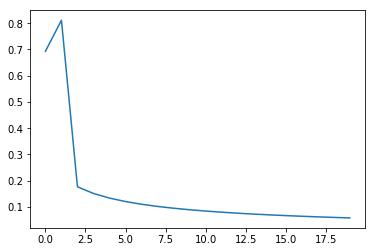

In [377]:
plt.plot(np.squeeze(costs))

In [321]:
def predict(X, w, b):
    A = sigmoid(np.dot(w.T, X) + b)
    A = A>0.5
    predictions = A.astype(int)
    return predictions
    

In [322]:
Y_pred = predict(X_test, w, b)

In [336]:
100 - (np.sum(Y_pred - Y_test)/Y_pred.shape[1] * 100)

88.888888888888886

In [344]:
100 - (np.abs(np.sum(predict(X_train,w,b) - Y_train))/Y_train.shape[1] * 100)

99.333333333333329

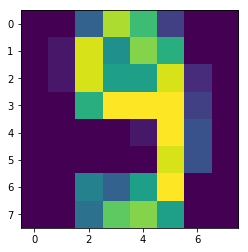

In [345]:
plt.imshow(X_test.T[34].reshape(8,8))

In [326]:
Y_pred[:, 34]

array([0])

In [327]:
Y_pred

array([[1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 1]])

In [328]:
Y_test

array([[1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 1]])

88.888888888888886

In [333]:
Y_pred.shape

(1, 54)